In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer
from sklearn.pipeline import make_pipeline


### Functions used to summaries results:

In [2]:
def accuracy(model, y_test, x_test):
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    mape = mean_absolute_percentage_error(y_test, pred)
    if model.__class__.__name__ == 'RegressionResultsWrapper':
        print('Multi linear regression\n----------')
    
    else:
        print('Lasso regression')
        
    
    print(f'Mean Squared Error: {round(mse,2)} \nMean Absolute Percentage Error: {round(mape*100,2)}%')

In [3]:
df = pd.read_csv('insurance_dataset.csv')
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


## Medical insurance charges
- **Age**: The age of the insured individual.
- **Gender**: The gender of the insured individual.
- **BMI** (Body Mass Index): A measure of body fat based on height and weight.
- **Children**: The number of children covered by the insurance plan.
- **Smoking Status**: Indicates whether the individual is a smoker.
- **Region**: The geographical region of the insured individual.
- **Medical History**: Information about the individual's old medical problems.
- **Family Medical History**: Information about the family's medical record.
- **Exercise Frequency**: The frequency of the individual's exercise routine.
- **Occupation**: The occupation of the insured individual.
- **Coverage Level**: The type of insurance plan.
- **Charges**: The health insurance charges for the individual

Data is from Kaggle: https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning/data


In [4]:
df # Should we add a constant term?

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


## Regressions

In [5]:
# Divide into dependent and independent vairables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30)
X_train['charges'] = y_train
training = X_train.copy()

In [6]:
# Good way to code regression with categorical variables
formula = 'charges ~ age + C(gender) + bmi + children + C(smoker) + C(region) + C(medical_history) + C(family_medical_history) + C(exercise_frequency) + C(occupation) + C(coverage_level)'
model = smf.ols(formula = formula, data = training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 7.407e+06
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:10:39   Log-Likelihood:            -4.9590e+06
No. Observations:              700000   AIC:                         9.918e+06
Df Residuals:                  699977   BIC:                         9.918e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          1.05e+04      2.305   4555.016      0.000    1.05e+04    1.05e+04
C(gender)[T.male]                                  999.1217      0.690   1447.780      0.000     997.769    1000.474
C(smoker)[T.yes]                                  4999.4174      0.690   7244.338      0.000    4998.065    5000.770
C(region)[T.northwest]                            -699.6230      0.975   -717.408      0.000    -701.534    -697.712
C(region)[T.southeast]                            -499.1939      0.977   -511.180      0.000    -501.108    -497.280
C(region)[T.southwest]                            -799.5937      0.975   -819.800      0.000    -801.505    -797.682
C(medical_history)[T.Heart disease]               3000.4644      0.976   3073.615      0.000    2998.551    3002.378
C(medical_history)[T.High blood pressure]        -1001.0370      0.976  -1025.143      0.000   -1002.951    -999.123
C(medical_history)[T.None]                       -1999.6666      0.975  -2050.599      0.000   -2001.578   -1997.755
C(family_medical_history)[T.Heart disease]        3000.3658      0.975   3076.038      0.000    2998.454    3002.278
C(family_medical_history)[T.High blood pressure]  -999.8063      0.976  -1024.216      0.000   -1001.720    -997.893
C(family_medical_history)[T.None]                -1999.9637      0.976  -2050.158      0.000   -2001.876   -1998.052
C(exercise_frequency)[T.Never]                   -2000.8322      0.977  -2048.657      0.000   -2002.746   -1998.918
C(exercise_frequency)[T.Occasionally]             -998.2471      0.976  -1022.431      0.000   -1000.161    -996.334
C(exercise_frequency)[T.Rarely]                  -1499.2746      0.976  -1535.592      0.000   -1501.188   -1497.361
C(occupation)[T.Student]                          -998.4427      0.976  -1023.276      0.000   -1000.355    -996.530
C(occupation)[T.Unemployed]                      -1498.9930      0.976  -1536.124      0.000   -1500.906   -1497.080
C(occupation)[T.White collar]                      501.5793      0.977    513.547      0.000     499.665     503.494
C(coverage_level)[T.Premium]                      5000.6229      0.845   5916.447      0.000    4998.966    5002.279
C(coverage_level)[T.Standard]                     1998.9613      0.845   2365.848      0.000    1997.305    2000.617
age                                                 19.9946      0.025    802.894      0.000      19.946      20.043
bmi                                                 49.9592      0.037   1336.244      0.000      49.886      50.032
children                                           200.1454      0.202    990.940      0.000     199.750     200.541
=========================================

In [7]:
accuracy(model, y_test, X_test)

Multi linear regression
----------
Mean Squared Error: 83396.84 
Mean Absolute Percentage Error: 1.62%


## Regularization with Lasso

In [8]:
lasso_df = pd.get_dummies(df) # Important for preparing the data for Lasso regression

X_lasso = lasso_df.drop('charges', axis = 1)
y_lasso = lasso_df.iloc[:, 3]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lasso,y_lasso, test_size= 0.30)


#### Using AIC to determine the alpha hyperparameter for Lasso regression

In [9]:
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion='aic')).fit(X_train_l, y_train_l)

/Users/hulaas/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/hulaas/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.248e+00, with an active set of 1 reg

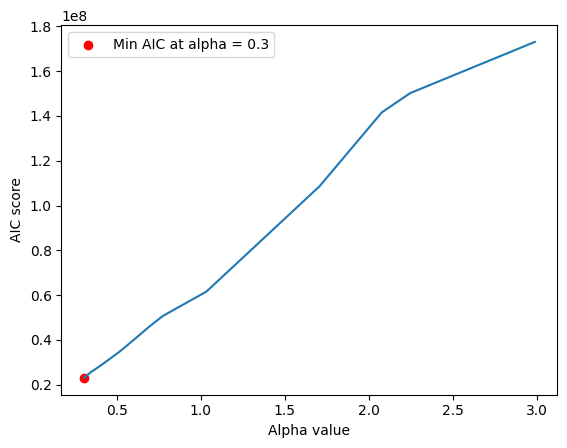

In [10]:
results = pd.DataFrame({
    'alphas': lasso_lars_ic[-1].alphas_,
    'aic criterion': lasso_lars_ic[-1].criterion_,
})

plt.plot(results['alphas'], results['aic criterion'])
plt.xlabel('Alpha value')
plt.ylabel('AIC score')
min_aic = results.min().tolist()
plt.scatter(min_aic[0], min_aic[1], c = 'red', label = f'Min AIC at alpha = {round(min_aic[0],2)}')

plt.legend()
plt.show()

- The LassoLarsIC API stops at that point because it estimates that it is converging. Continuing would introduce numerical errors higher than the remaining correlation according to sklearn documentation. 

In [11]:
clf = Lasso(alpha=0.3, fit_intercept=True, max_iter=10000)
clf.fit(X_train_l, y_train_l)

Lasso(alpha=0.3, max_iter=10000)

In [12]:
accuracy(clf, y_test_l, X_test_l)

Lasso regression
Mean Squared Error: 83359.05 
Mean Absolute Percentage Error: 1.62%


#### Interpretation

Seems Lasso yields little improvement from the basic OLS model. This is of no suprise as on the summary for the OLS model it seemed to strongly indicate that all variables are important. Since Lasso is a linear regression with a penalty term that helps to prevent overfitting and facilitate automatic feature selection, it is not suprising that it did not yield much improvements as all features in the dataset seems important.

In [25]:
df = pd.read_csv('insurance_dataset.csv')

# Define independent and dependent variables
X = df.drop('charges', axis=1)
y = df['charges']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,medical_history_Heart disease,medical_history_High blood pressure,family_medical_history_Heart disease,family_medical_history_High blood pressure,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,25,25.38,2,False,True,True,False,False,False,False,False,True,False,True,False,False,False,True,True,False
2,38,44.88,2,True,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False
3,25,19.89,0,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,49,38.21,3,True,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,46.67,2,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
999996,33,36.83,2,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
999997,39,39.84,0,True,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
999998,37,45.06,4,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False


In [27]:
# define the model pipeline with standard scaling and Lasso regression
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.21, max_iter=10000))

# set up K-Fold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=2)

In [28]:
mse_scorer = make_scorer(mean_squared_error)
#cross-validation and get MSE scores
mse_scores = cross_val_score(lasso_pipeline, X, y, cv=kf, scoring=mse_scorer)

print("MSE for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

MSE for each fold: [1087058.43337305 1085574.20422145 1085064.02687501 1077676.93576959
 1089130.5826431  1078297.08713946 1084337.30078445 1083327.55370126
 1085337.39077996 1081698.59216504]
Average MSE: 1083750.2107452361


In [33]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV, Ridge
import numpy as np


df = pd.read_csv('insurance_dataset.csv')

alphas = np.logspace(-4, 4, 100)
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')).fit(X_train_l, y_train_l)

best_alpha_ridge = ridge_cv[-1].alpha_
ridge_model = Ridge(alpha=best_alpha_ridge).fit(X_train_l, y_train_l)

y_pred_ridge = ridge_model.predict(X_test_l)
ridge_mse = mean_squared_error(y_test_l, y_pred_ridge)

print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")
print(f"Mean Squared Error on test data: {ridge_mse}")

Best alpha for Ridge Regression: 0.055908101825122285
Mean Squared Error on test data: 83314.1287528692


In [34]:
#Ridge with same alpha as for Lasso regression
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')).fit(X_train_l, y_train_l)
ridge_model = Ridge(alpha=0.21).fit(X_train_l, y_train_l)
y_pred_ridge = ridge_model.predict(X_test_l)
ridge_mse = mean_squared_error(y_test_l, y_pred_ridge)
print(f"Mean Squared Error on test data: {ridge_mse}")


Mean Squared Error on test data: 83314.12750601213
